<a href="https://colab.research.google.com/github/isharridho/Technical-Test-20-9-2022/blob/main/Coding_test_Isharridho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Isharridho Pratama

In [1]:
!pip install -U xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 49 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
pd.set_option('display.max_column',None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/employee.csv')
df.head()

,Unnamed: 0,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                2940 non-null   int64 
 1   EmployeeNumber            2940 non-null   int64 
 2   Attrition                 2940 non-null   int64 
 3   Age                       2940 non-null   int64 
 4   BusinessTravel            2940 non-null   object
 5   DailyRate                 2940 non-null   int64 
 6   Department                2940 non-null   object
 7   DistanceFromHome          2940 non-null   int64 
 8   Education                 2940 non-null   int64 
 9   EducationField            2940 non-null   object
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [8]:
df.isnull().sum()

Unnamed: 0                  0
EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.head()

,Unnamed: 0,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1,2,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,2,3,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,3,4,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,4,5,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Dataset :

The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeNumber** - Employee Identifier
* **Attrition** - Did the employee attrite?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available**
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available**
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available**
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

# EDA

(1) Drop semua kolom yang tidak diperlukan pada data employee.csv. Lakukan EDA univariat untuk setiap kolom numerik pada employee.csv yang mencakup:<p>
    a. histogram dan boxplot untuk tiap kolom<p>
    b. metrik statistik dasar untuk tiap kolom: mean, std, min, q1, q2, q3, iqr, max<p>
    c. identifikasi nilai upper whisker dan lower whisker dari boxplot tiap kolom<p>
    d. apabila terdapat outlier (<q1-1.5*iqr | >q3+1.5*iqr): hitung count, proportion, dan list dari outlier tiap kolom<p>
        e. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

In [10]:
# drop unwanted feature
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['EmployeeNumber'],axis=1,inplace=True)

In [11]:
# numerical column
num_col = [col for col in df.columns if df[col].dtype == int]
num_col

['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


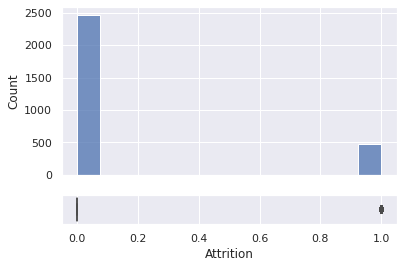

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


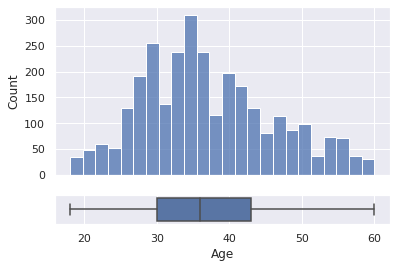

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


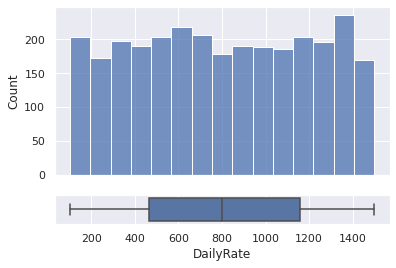

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


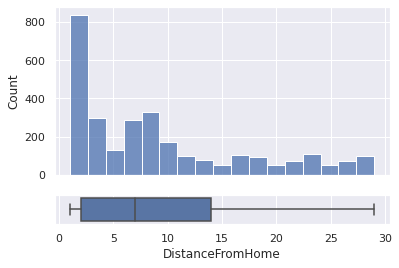

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


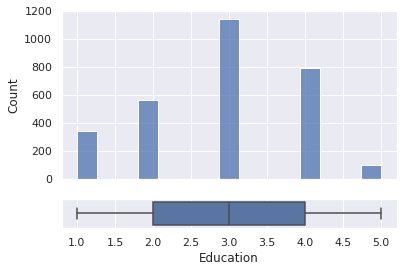

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


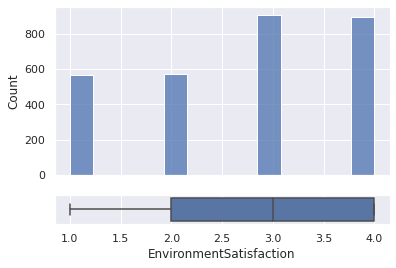

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


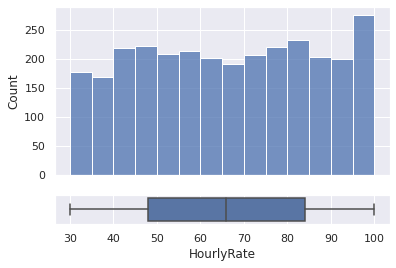

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


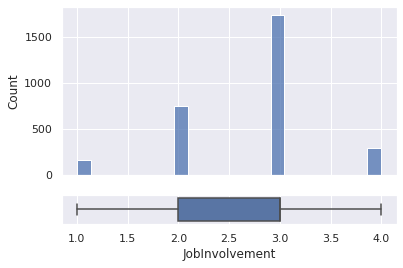

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


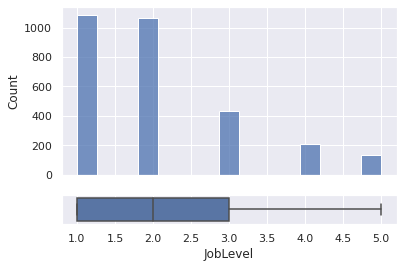

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


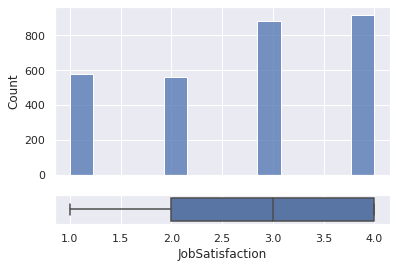

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


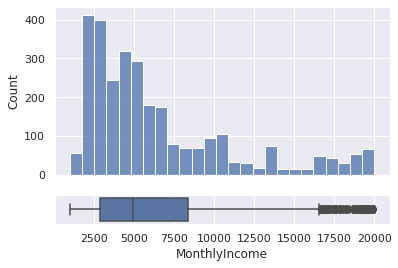

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


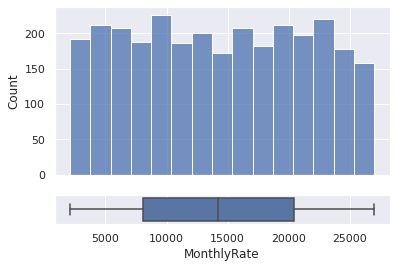

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


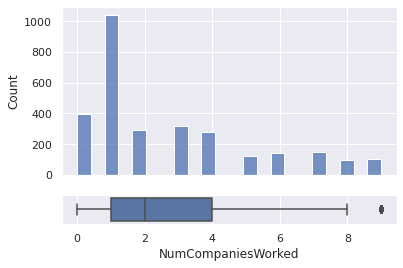

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


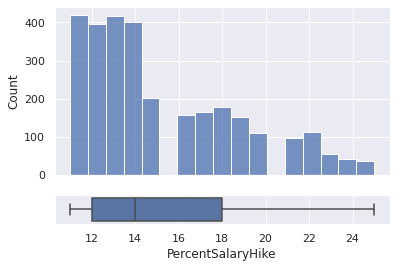

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


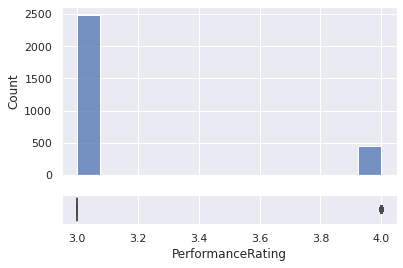

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


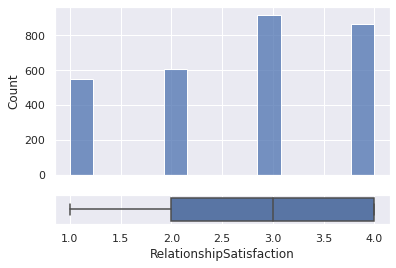

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


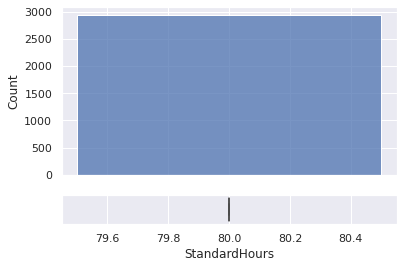

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


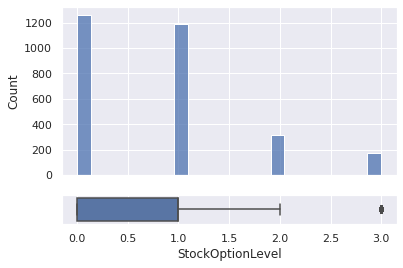

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


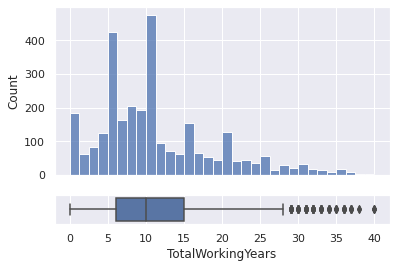

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


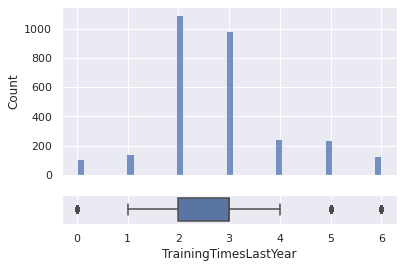

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


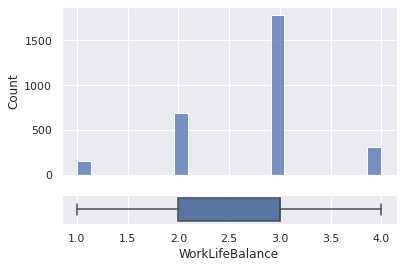

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


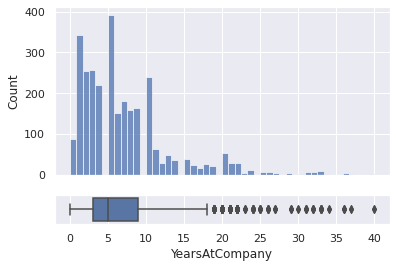

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


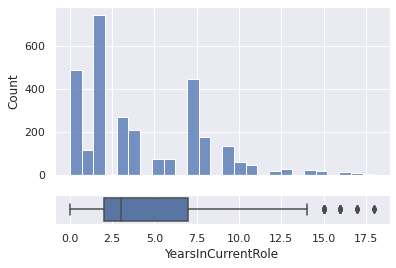

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


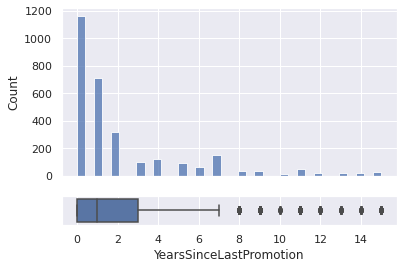

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


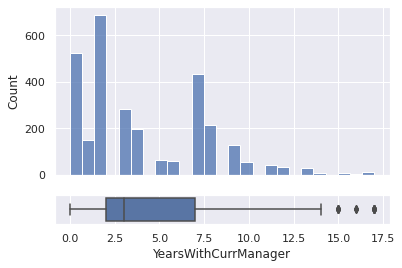

In [12]:
sns.set(style="darkgrid")

for col in df[num_col].columns:
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})

    # assigning a graph to each ax
    sns.histplot(data=df, x=col, ax=ax_hist)
    sns.boxplot(df[col], ax=ax_box)
    plt.show()
plt.show()

In [13]:
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'Q1: {q1}')
    print(f'Q3: {q3}')
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'lower_whisker: {limit_bawah}')
    print(f'upper_whisker: {limit_atas}') 
    print(f'Mean : {data.mean()}')
    print(f'Mean : {data.std()}')

In [14]:
for i in df[num_col]:
  print('Feature :', i)
  find_anomalies(df[i])
  print('\n')

Feature : Attrition
Q1: 0.0
Q3: 0.0
IQR: 0.0
lower_whisker: 0.0
upper_whisker: 0.0
Mean : 0.16122448979591836
Mean : 0.3678004436206843


Feature : Age
Q1: 30.0
Q3: 43.0
IQR: 13.0
lower_whisker: 10.5
upper_whisker: 62.5
Mean : 36.923809523809524
Mean : 9.133819193338306


Feature : DailyRate
Q1: 465.0
Q3: 1157.0
IQR: 692.0
lower_whisker: -573.0
upper_whisker: 2195.0
Mean : 802.4857142857143
Mean : 403.44044675716253


Feature : DistanceFromHome
Q1: 2.0
Q3: 14.0
IQR: 12.0
lower_whisker: -16.0
upper_whisker: 32.0
Mean : 9.19251700680272
Mean : 8.105485130775502


Feature : Education
Q1: 2.0
Q3: 4.0
IQR: 2.0
lower_whisker: -1.0
upper_whisker: 7.0
Mean : 2.912925170068027
Mean : 1.0239906927982962


Feature : EnvironmentSatisfaction
Q1: 2.0
Q3: 4.0
IQR: 2.0
lower_whisker: -1.0
upper_whisker: 7.0
Mean : 2.721768707482993
Mean : 1.0928962372258053


Feature : HourlyRate
Q1: 48.0
Q3: 84.0
IQR: 36.0
lower_whisker: -6.0
upper_whisker: 138.0
Mean : 65.89115646258503
Mean : 20.32596873772375


Fe

In [15]:
num_col

['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [16]:
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1

In [17]:
# Percentage outlier

(((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).sum())/len(df)*100

Attrition                   16.122449
Age                          0.000000
DailyRate                    0.000000
DistanceFromHome             0.000000
Education                    0.000000
EnvironmentSatisfaction      0.000000
HourlyRate                   0.000000
JobInvolvement               0.000000
JobLevel                     0.000000
JobSatisfaction              0.000000
MonthlyIncome                7.755102
MonthlyRate                  0.000000
NumCompaniesWorked           3.537415
PercentSalaryHike            0.000000
PerformanceRating           15.374150
RelationshipSatisfaction     0.000000
StandardHours                0.000000
StockOptionLevel             5.782313
TotalWorkingYears            4.285714
TrainingTimesLastYear       16.190476
WorkLifeBalance              0.000000
YearsAtCompany               7.074830
YearsInCurrentRole           1.428571
YearsSinceLastPromotion      7.278912
YearsWithCurrManager         0.952381
dtype: float64

In [18]:
# Descriptive Statistics 

df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition,2940.0,0.161224,0.367800,0.0,0.0,0.0,0.0,1.0
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
Education,2940.0,2.912925,1.023991,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.0,3.0,4.0,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.0,3.0,3.0,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,2940.0,2.728571,1.102658,1.0,2.0,3.0,4.0,4.0


(2) Lakukan EDA univariat untuk setiap kolom kategorikal pada employee.csv yang mencakup:<p>
    a. countplot untuk tiap kolom<p>
    b. daftar kategori unik dan frekuensinya untuk tiap kolom<p>
        c. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

In [19]:
cat_col = [col for col in df.columns if df[col].dtype != int]
cat_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

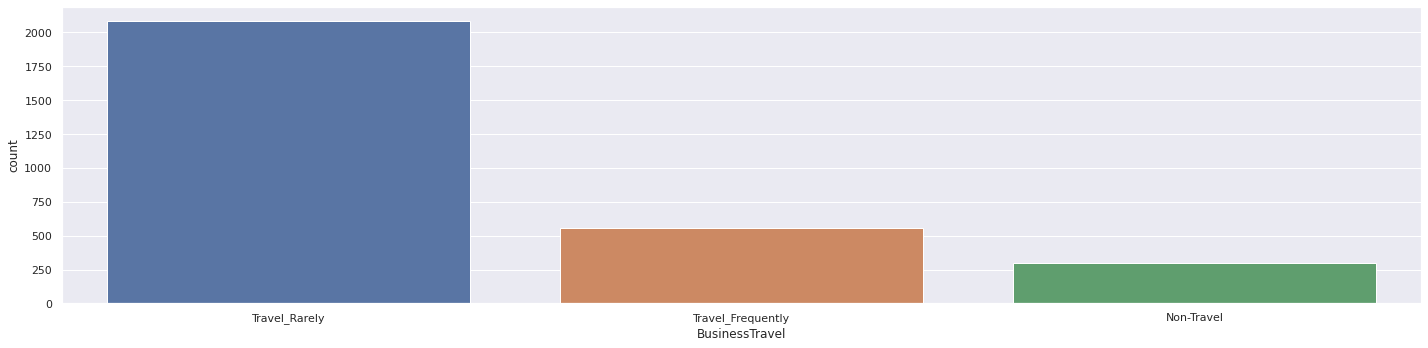

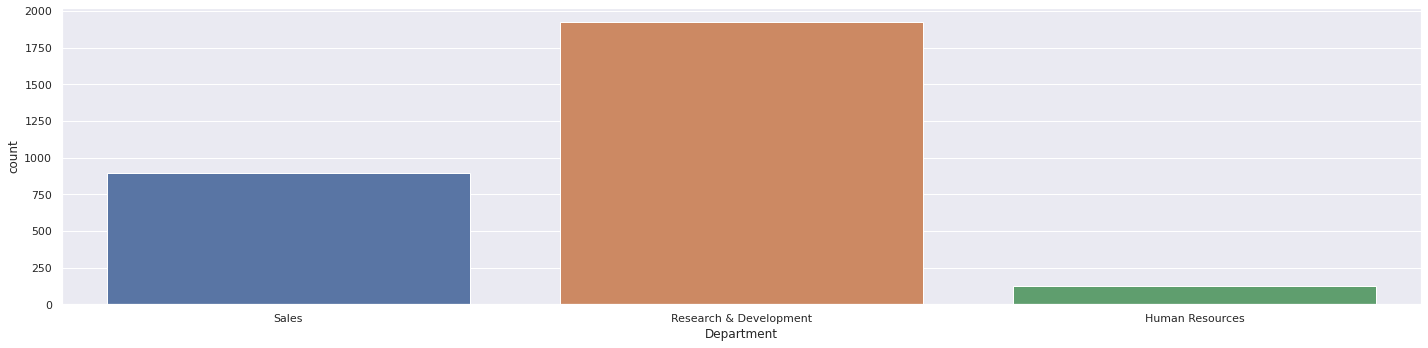

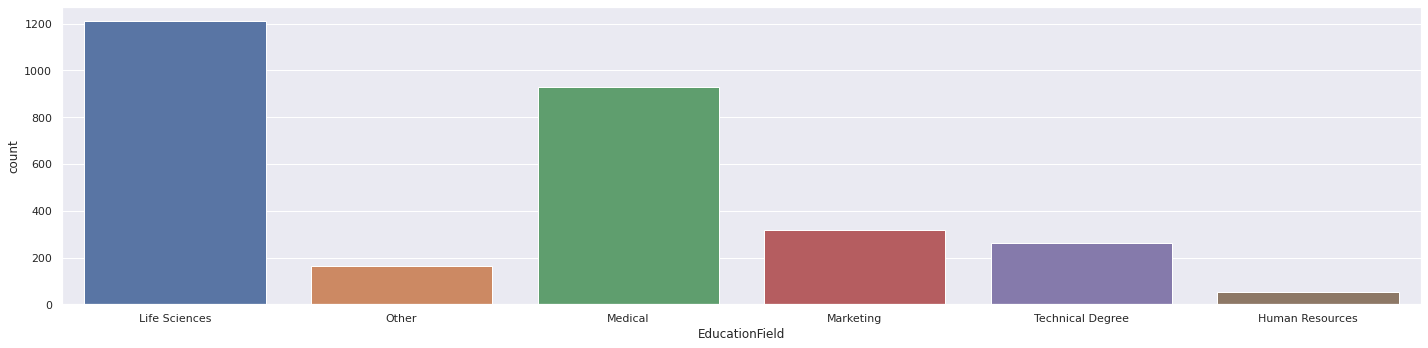

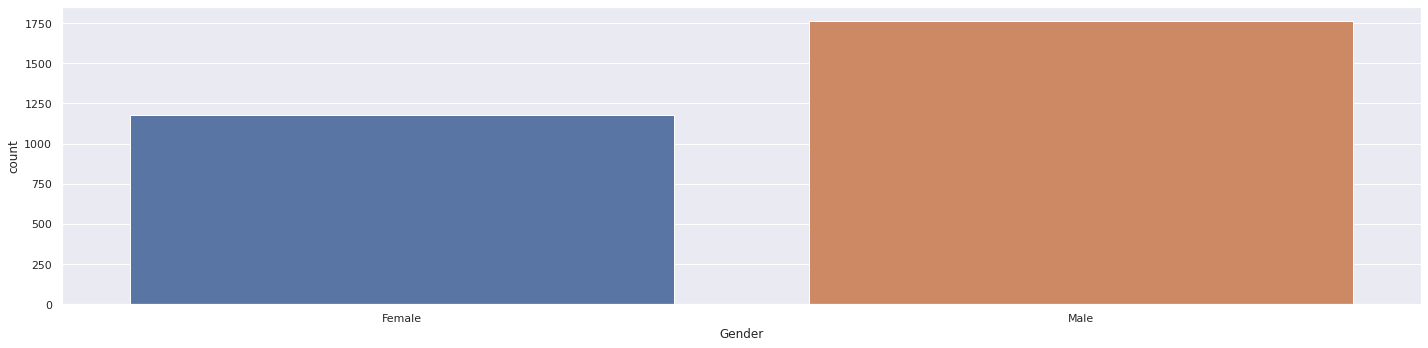

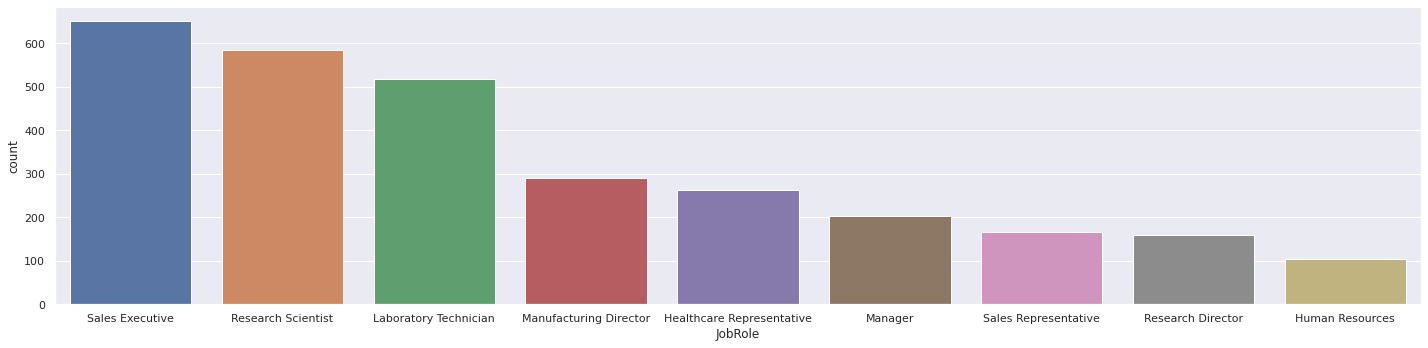

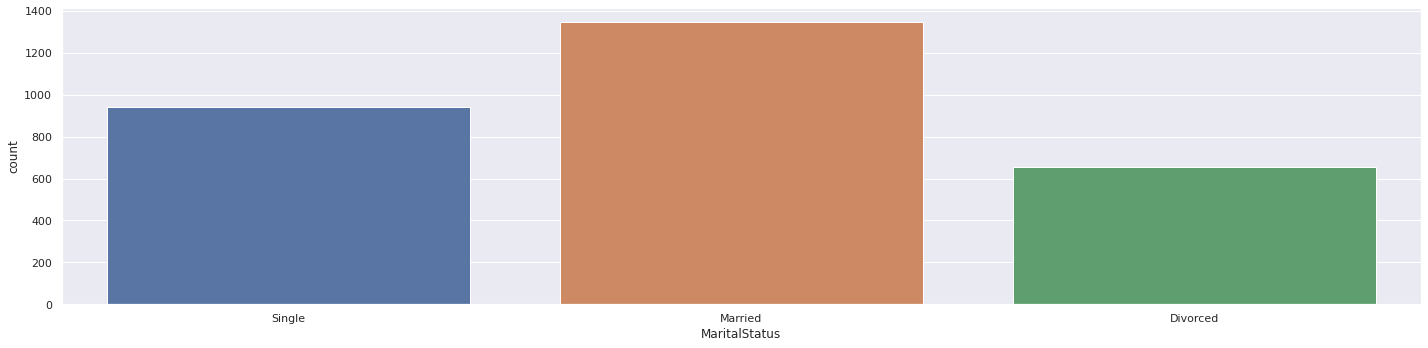

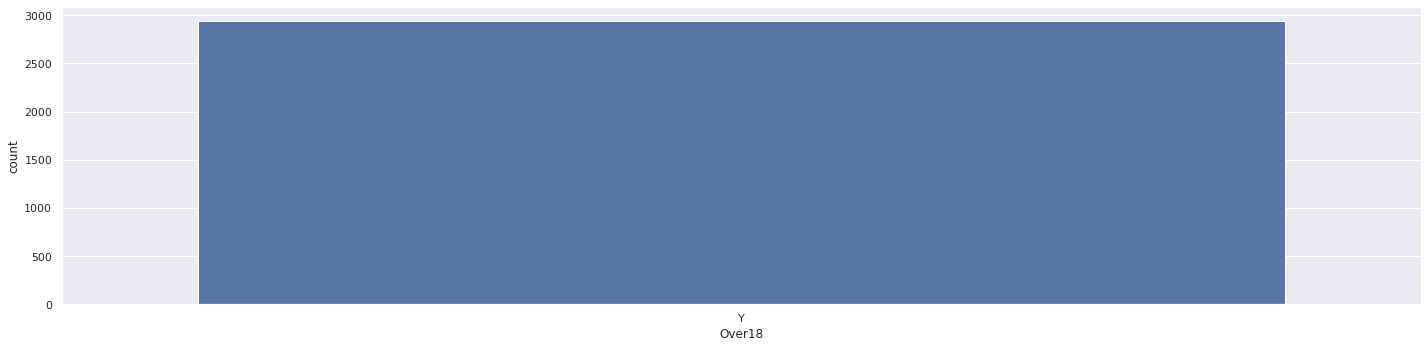

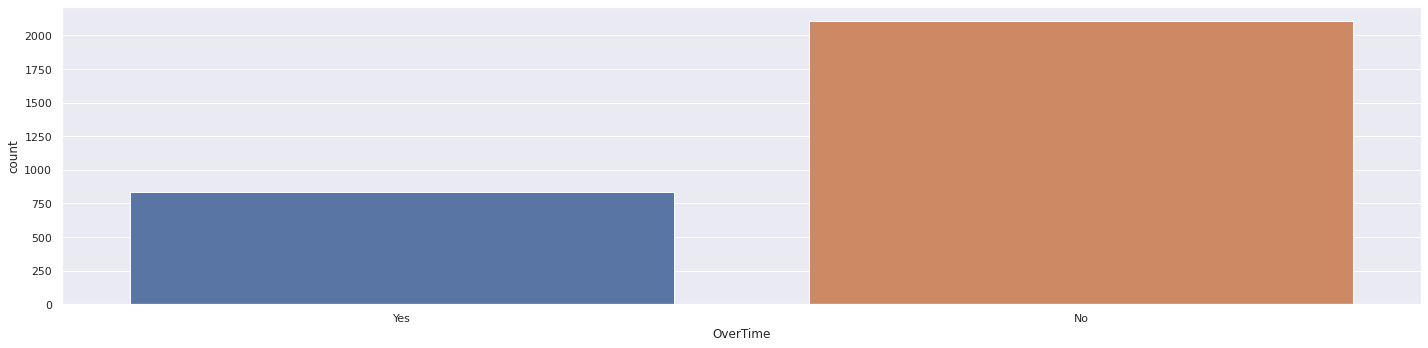

In [20]:
for i,col in enumerate(df[cat_col]):
  plt.figure(i,figsize=(20,5))
  sns.countplot(x=col,data=df[cat_col])
  plt.tight_layout()
  plt.show()

In [21]:
for i in df[cat_col]:
  print(df[i].value_counts())
  print('\n')

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64


Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64


Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64


Male      1764
Female    1176
Name: Gender, dtype: int64


Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64


Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64


Y    2940
Name: Over18, dtype: int64


No     2108
Yes     832
Name: OverTime, dtype: int64




In [22]:
left_df = df[df['Attrition']=='Yes']
stay_df = df[df['Attrition']=='No']

In [23]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 
print('Total',len(df))
print('number of employee left company', len(left_df))
print('percentage of employee left company:', (len(left_df)/len(df))*100,'%')
print('number of employee stay', len(stay_df))
print('percentage of employee stay :', (len(stay_df)/len(df))*100,'%')

Total 2940
number of employee left company 0
percentage of employee left company: 0.0 %
number of employee stay 0
percentage of employee stay : 0.0 %


(3) Lakukan EDA multivariat untuk pasangan kolom numerik dan kolom 'Attrition' pada employee.csv yang mencakup:<p>
    a. boxplot (atau variasinya) antara semua kolom numerik (axis y) dan kolom 'attrition' (axis x)<p>
    b. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

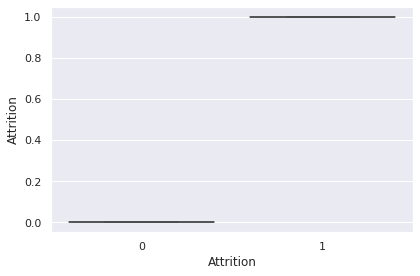

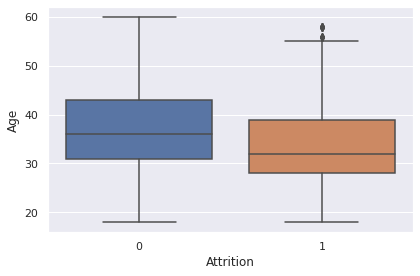

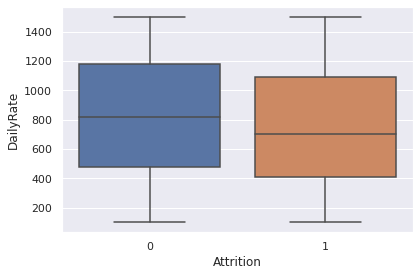

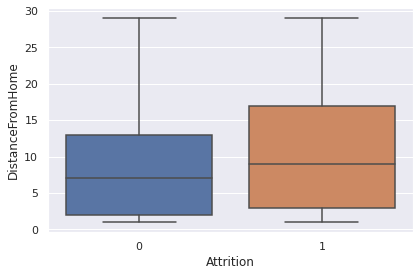

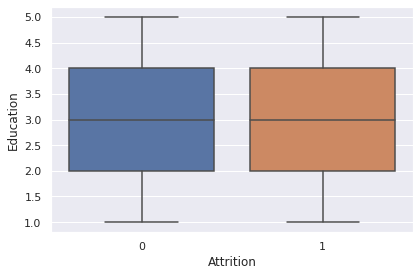

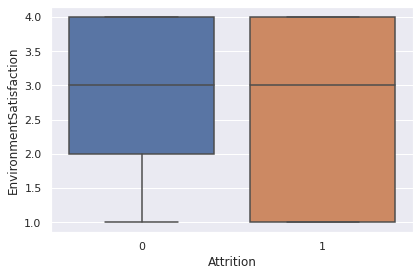

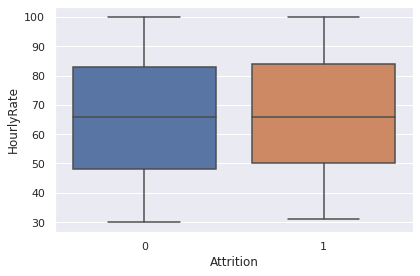

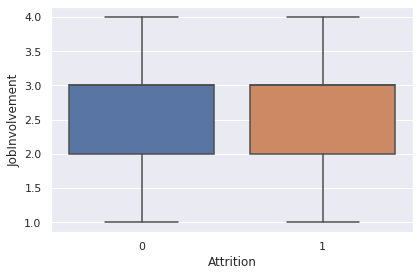

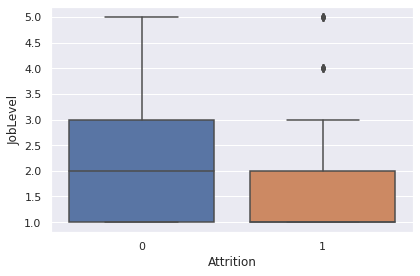

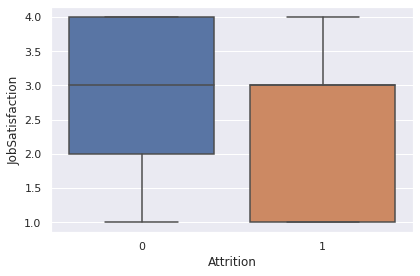

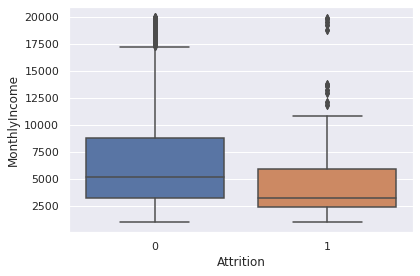

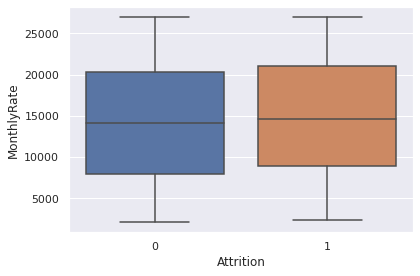

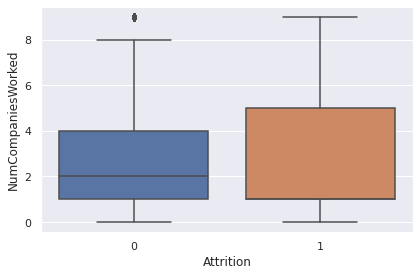

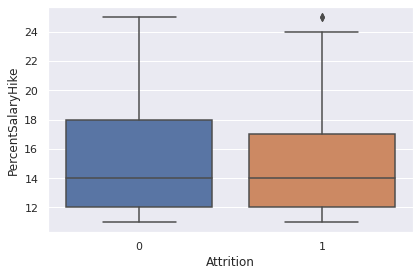

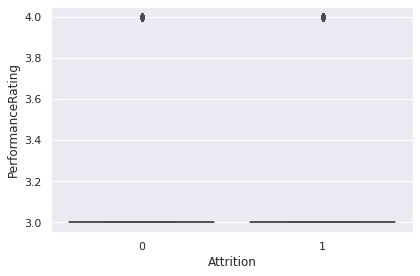

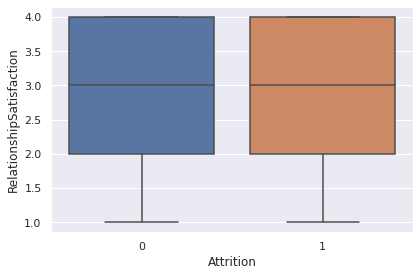

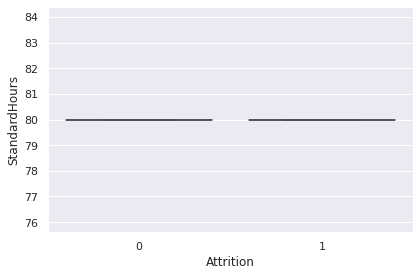

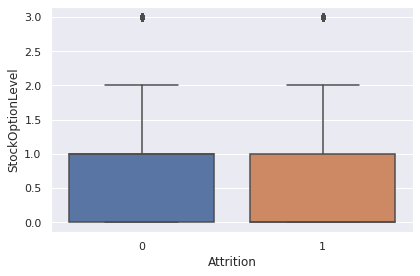

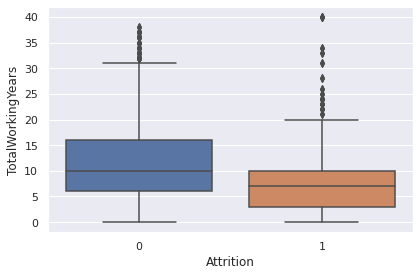

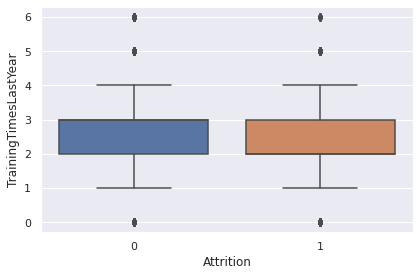

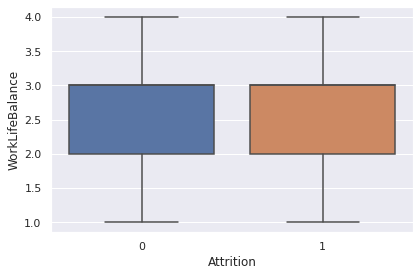

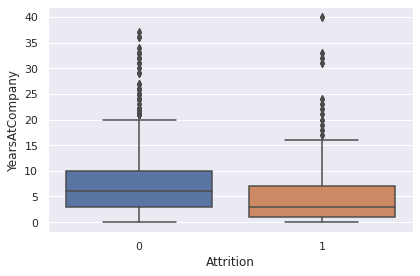

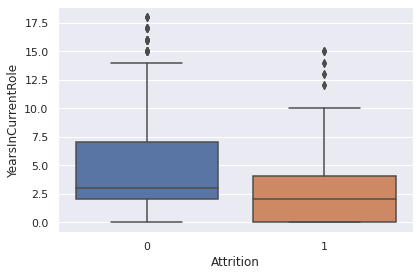

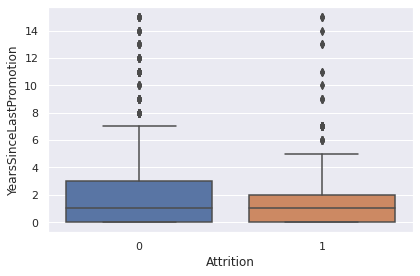

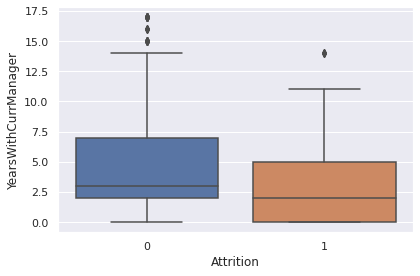

In [24]:
for i,col in enumerate(df[num_col]):
  plt.figure(i)
  sns.boxplot(y=col, x=df['Attrition'], data=df[num_col])
  plt.tight_layout()
  plt.show()

(4) Lakukan EDA multivariat untuk pasangan kolom kategorikal dan kolom 'Attrition' pada employee.csv yang mencakup:<p>
    a. countplot untuk tiap kolom kategorikal dengan kolom 'Attrition' sebagai hue <p>
    b. stacked barplot yang menunjukkan proporsi value kolom 'Attrition' untuk masing-masing kategori pada semua kolom kategorikal (1 kolom kategorikal 1 plot, 1 plot berisi stacked bar sejumlah banyaknya kategori unik pada kolom kategori tersebut) <p>
        c. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

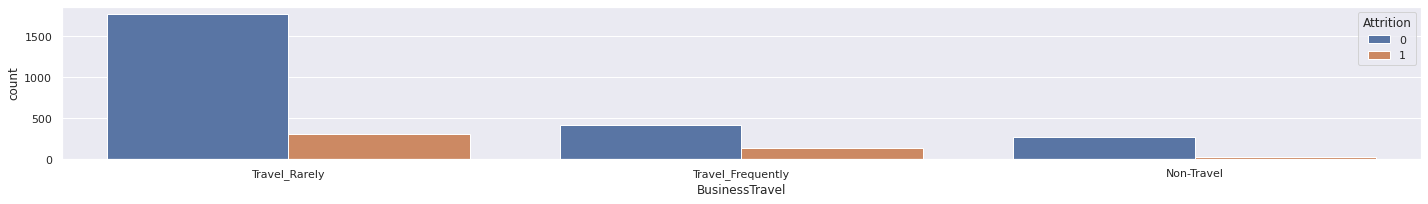

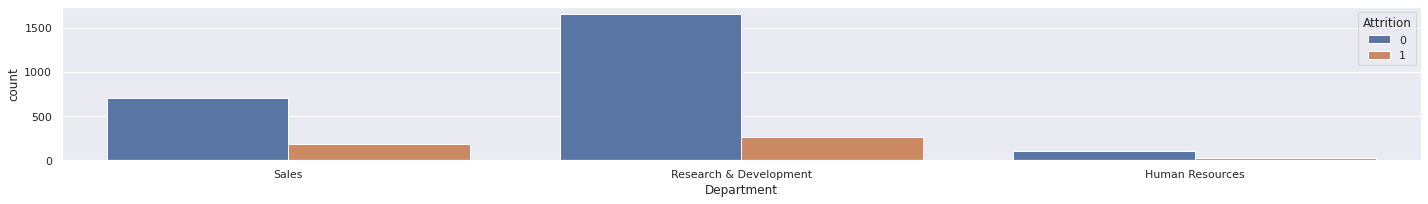

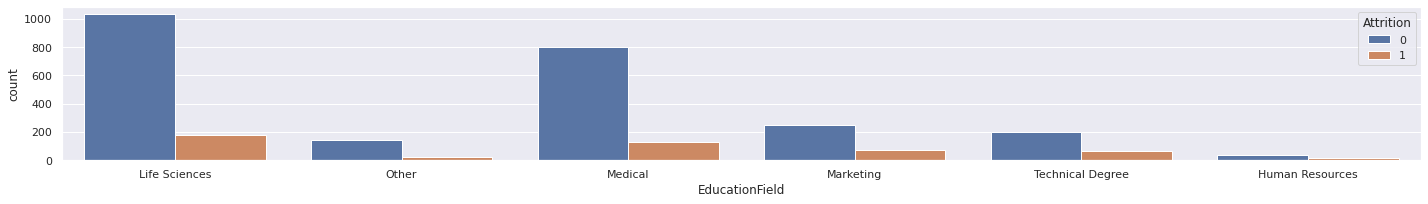

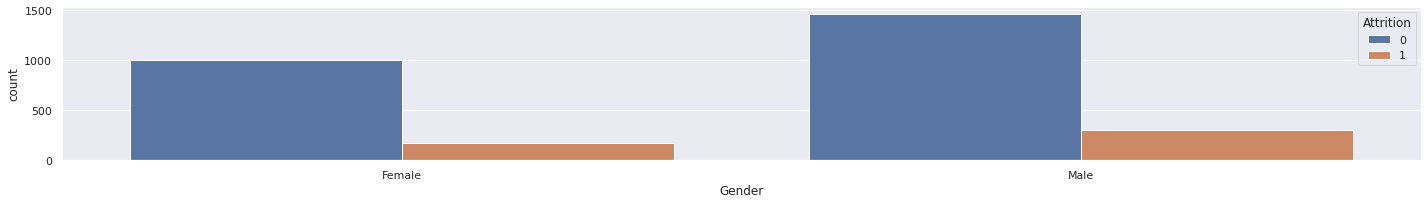

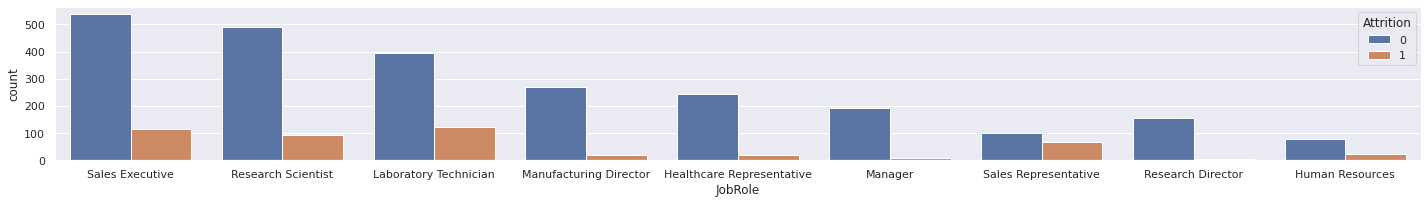

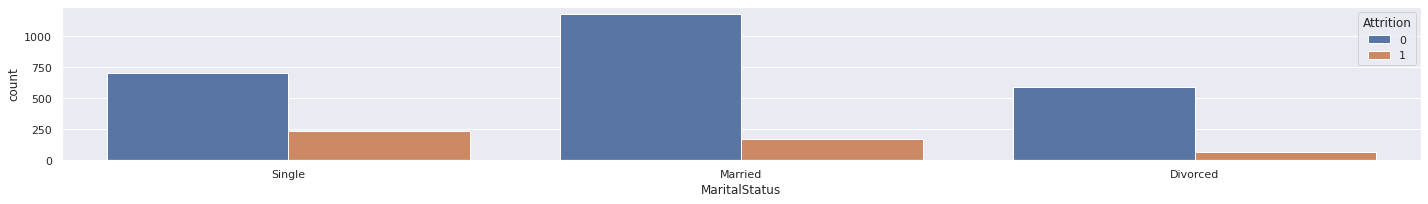

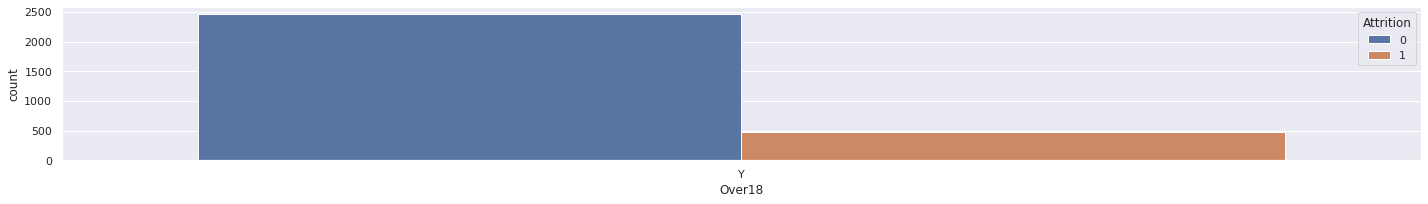

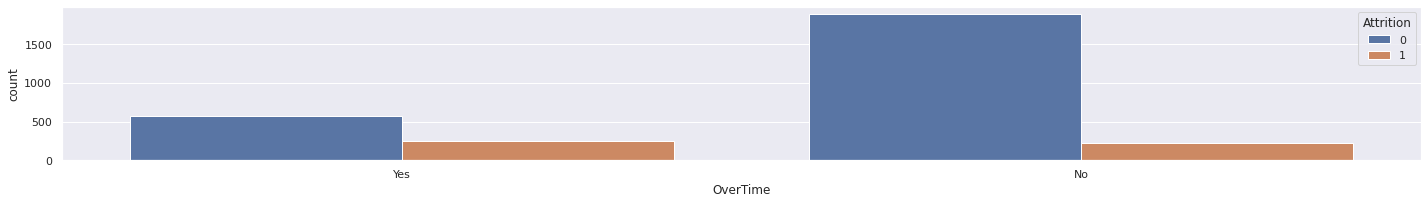

In [25]:
for i,col in enumerate(df[cat_col]):
  plt.figure(i,figsize=(20,3))
  sns.countplot(x=col, hue=df['Attrition'], data=df[cat_col])
  plt.tight_layout()
  plt.show()

In [26]:
pd.crosstab(df['OverTime'], df['Attrition'])

Attrition,0,1
OverTime,,
No,1888,220
Yes,578,254


<Figure size 1800x216 with 0 Axes>

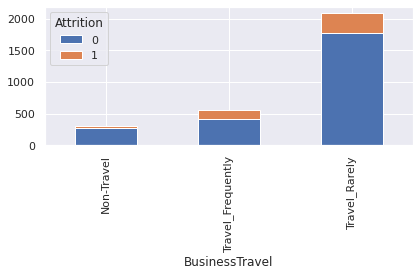

<Figure size 1800x216 with 0 Axes>

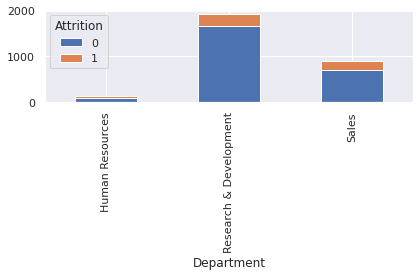

<Figure size 1800x216 with 0 Axes>

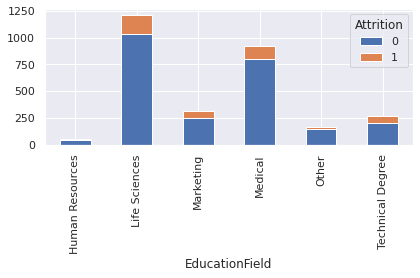

<Figure size 1800x216 with 0 Axes>

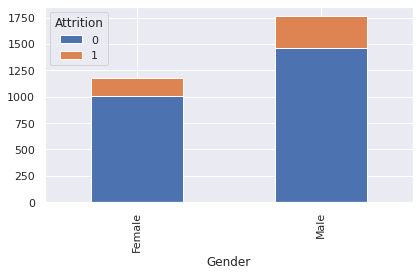

<Figure size 1800x216 with 0 Axes>

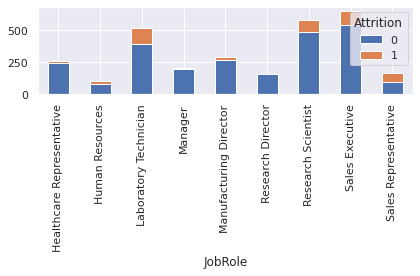

<Figure size 1800x216 with 0 Axes>

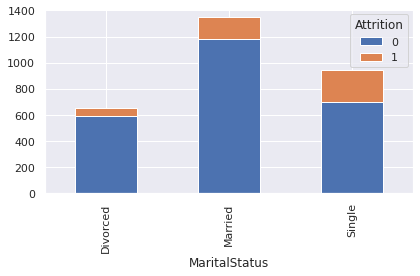

<Figure size 1800x216 with 0 Axes>

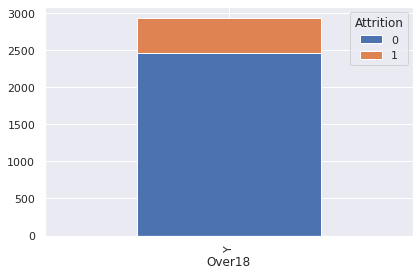

<Figure size 1800x216 with 0 Axes>

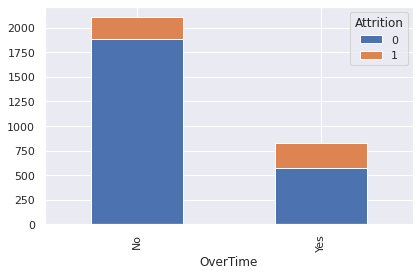

In [27]:
for i,col in enumerate(df[cat_col]):
  plt.figure(i,figsize=(25,3))
  pd.crosstab(df[col],df['Attrition']).plot(kind='bar',stacked=True)
  plt.tight_layout()
  plt.show()

(5) Lakukan independen t-test (2-sided) dengan ketentuan: <p>
H0: Tidak ada perbedaan mean 'Total Working Years' antara karyawan yang keluar maupun menetap (gunakan kolom 'Attrition' sebagai acuan)<p>
    H1: Terdapat perbedaan mean 'Total Working Years' antara karyawan yang keluar maupun menetap (gunakan kolom 'Attrition' sebagai acuan)<p>
        alpha = 5%<p>
            Print hasil t-test dan tuliskan kesimpulannya.

In [28]:
from scipy.stats import ttest_ind

result = list(ttest_ind(
    df[df['Attrition']=='No']['TotalWorkingYears'],
    df[df['Attrition']=='Yes']['TotalWorkingYears'],
    equal_var=True
))

print('T-Statistics',result[0])
print('P-Value:',result[1])

if result[1]<0.05:
  print('''H1: Terdapat perbedaan mean 'Total Working Years' antara karyawan yang keluar maupun menetap ''')
else:
  print('''H0: Tidak ada perbedaan mean 'Total Working Years' antara karyawan yang keluar maupun menetap''')

T-Statistics nan
P-Value: nan
H0: Tidak ada perbedaan mean 'Total Working Years' antara karyawan yang keluar maupun menetap


(6) Lakukan one-way ANOVA dengan ketentuan: <p>
H0: Tidak ada perbedaan mean 'Age' antara karyawan dari 3 departemen yang ada di dataset<p>
    H1: Setidaknya terdapat 2 departemen yang mean umur karyawannya berbeda<p>
            Print hasil one-way ANOVA dan tuliskan kesimpulannya.

In [29]:
from scipy.stats import f_oneway
result = f_oneway(df[df['Department']=='Sales']['Age'],
         df[df['Department']=='Research & Development']['Age'],
         df[df['Department']=='Human Resources']['Age'])

print('Statistics',result[0])
print('P-Value:',result[1])

if result[1]<0.05:
  print('''H0: Tidak ada perbedaan mean 'Age' antara karyawan dari 3 departemen yang ada di dataset ''')
else:
  print('''H1: Setidaknya terdapat 2 departemen yang mean umur karyawannya berbeda''')

Statistics 1.5325718311968073
P-Value: 0.21615216157151168
H1: Setidaknya terdapat 2 departemen yang mean umur karyawannya berbeda


# Classification

(8) Persiapkan dataset untuk klasifikasi. Jadikan kolom 'Attrition' sebagai target (y). Drop semua kolom yang dianggap tidak diperlukan.

In [30]:
X = df.drop(['Attrition'],axis = 1)
y = df['Attrition']

(9) Lakukan train test split, test:test = 4:1, stratify = y.

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold

X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    stratify = y,
    random_state=1)

(10) Lakukan feature engineering yang dianggap diperlukan pada trainset: imputation, encoding, scaling, selection, dll. Lakukan transformasi serupa pada testset tanpa melakukan fitting kembali.

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['BusinessTravel', 'Department',
                                  'EducationField', 'Gender', 'JobRole',
                                  'MaritalStatus', 'Over18', 'OverTime']),
    ('Scaler', StandardScaler(), ['Age', 'DailyRate',
                                  'DistanceFromHome', 'Education',
                                  'EnvironmentSatisfaction', 'HourlyRate',
                                  'JobInvolvement', 'JobLevel',
                                  'JobSatisfaction', 'MonthlyIncome',
                                  'MonthlyRate', 'NumCompaniesWorked',
                                  'PercentSalaryHike', 'PerformanceRating',
                                  'RelationshipSatisfaction', 'StandardHours',
                                  'StockOptionLevel', 'TotalWorkingYears',
                                  'TrainingTimesLastYear', 'WorkLifeBalance',
                                  'YearsAtCompany', 'YearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager'])
], remainder='passthrough')

In [33]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot', OneHotEncoder(),
                                 ['BusinessTravel', 'Department',
                                  'EducationField', 'Gender', 'JobRole',
                                  'MaritalStatus', 'Over18', 'OverTime']),
                                ('Scaler', StandardScaler(),
                                 ['Age', 'DailyRate', 'DistanceFromHome',
                                  'Education', 'EnvironmentSatisfaction',
                                  'HourlyRate', 'JobInvolvement', 'JobLevel',
                                  'JobSatisfaction', 'MonthlyIncome',
                                  'MonthlyRate', 'NumCompaniesWorked',
                                  'PercentSalaryHike', 'PerformanceRating',
                                  'RelationshipSatisfaction', 'StandardHours',
                                  'StockOptionLevel', 'TotalWorkingYears',
                        

(11) Siapkan 3 estimator: lakukan cross-validation dengan estimator Logistic Regression, Decision Tree Classifier, dan XGBoost Classifier (apabila tidak bisa install xgboost silahkan pilih classifier lain untuk menggantikan) untuk menentukan nilai optimal untuk berbagai hyperparameter masing-masing estimator. 

In [34]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
logreg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
xgb = XGBClassifier()

(12) Fit ketiga estimator dengan trainset. Print classification report untuk trainset dan testset untuk ketiga estimator.

In [36]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold


models = [logreg,dt,xgb]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'Decision Tree', 'XGBoost'],'mean roc_auc':rata,'stdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

,mean roc_auc,stdev
model,,
XGBoost,0.937203,0.015403
Logistic Regression,0.845091,0.024787
Decision Tree,0.826637,0.025347


(13) Dari hasil performansi yang Anda dapatkan manakah estimator yang paling baik?

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

models = [logreg,dt,xgb]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression','Decision Tree', 'XGBoost']):
    estimator,y_pred,X_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(X_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'Decision Tree', 'XGBoost'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       493
           1       0.80      0.49      0.61        95

    accuracy                           0.90       588
   macro avg       0.85      0.74      0.78       588
weighted avg       0.89      0.90      0.89       588

Decision Tree 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       493
           1       0.87      0.98      0.92        95

    accuracy                           0.97       588
   macro avg       0.93      0.98      0.95       588
weighted avg       0.98      0.97      0.97       588

XGBoost 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       0.98      1.00      0.99        95

    accuracy                           1.00       588
   macro avg       0.99      1.00      0.99       588
weighted avg       1.00   

,roc_auc score
model,
XGBoost,0.999231
Decision Tree,0.975275
Logistic Regression,0.874730


The Best Model is XGBoost Classifier

# Regression

(14) Persiapkan dataset untuk regresi. Jadikan kolom 'MonthlyIncome' sebagai target.

In [38]:
dfnew1 = df.copy()
X = dfnew1.drop(['MonthlyIncome'],axis=1)
y = dfnew1['MonthlyIncome']

(15) Split trainset dan testset. test size = 0.2.

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold

X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=1)

(16) Lakukan transformasi yang diperlukan pada trainset. Lakukan juga pada testset tanpa fitting ulang.

In [40]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['BusinessTravel', 'Department',
                                  'EducationField', 'Gender', 'JobRole',
                                  'MaritalStatus', 'Over18', 'OverTime']),
    ('Scaler', StandardScaler(), ['Attrition','Age', 'DailyRate',
                                  'DistanceFromHome', 'Education',
                                  'EnvironmentSatisfaction', 'HourlyRate',
                                  'JobInvolvement', 'JobLevel',
                                  'JobSatisfaction',
                                  'MonthlyRate', 'NumCompaniesWorked',
                                  'PercentSalaryHike', 'PerformanceRating',
                                  'RelationshipSatisfaction', 'StandardHours',
                                  'StockOptionLevel', 'TotalWorkingYears',
                                  'TrainingTimesLastYear', 'WorkLifeBalance',
                                  'YearsAtCompany', 'YearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager'])
], remainder='passthrough')

(17) Siapkan 2 regressor learning alg.: (1) linear/polynomial dan (2) decision tree/random forest/xgboost regressor. Dengan menggunakan cross validation tentukan hyperparamer optimal untuk kedua regressor.

In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor


# Cross Validation
def cross_val_test(transform):
    lr = LinearRegression()
    xgb = XGBRegressor(random_state=2022)

    model = [lr,xgb]

  
    score_mean_MAPE = []
    score_test_MAPE = []
    
    score_mean_r2 = []
    score_test_r2 = []

    score_mean_MAE = []
    score_test_MAE = []
    
    score_mean_MSE = []
    score_test_MSE = []

    score_mean_RMSE = []
    score_test_RMSE = []
    
    for i in model:
        
        estimator = Pipeline([('preprocessing', transform),('model',i)])
        
        # MAPE
        cv_MAPE = -1 * cross_val_score(estimator, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=2022), scoring='neg_mean_absolute_percentage_error')
        cv_MAPE
        score_mean_MAPE.append(cv_MAPE.mean())

        estimator.fit(X_train,y_train)

        test_MAPE = mean_absolute_percentage_error(y_test,estimator.predict(X_test))
        score_test_MAPE.append(test_MAPE)
        
        # r2
        cv_r2 = cross_val_score(estimator, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=2022), scoring='r2')
        
        score_mean_r2.append(cv_r2.mean())
        

        estimator.fit(X_train,y_train)
        test_r2 = r2_score(y_test,estimator.predict(X_test))
        score_test_r2.append(test_r2)
     
        # MAE
        cv_MAE = -1 * cross_val_score(estimator, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=2022), scoring='neg_mean_absolute_error')
        cv_MAE
        
        score_mean_MAE.append(cv_MAE.mean())
       

        estimator.fit(X_train,y_train)

        test_MAE = mean_absolute_error(y_test,estimator.predict(X_test))
        score_test_MAE.append(test_MAE)

        # MSE
        cv_MSE = -1 * cross_val_score(estimator, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=2022), scoring='neg_mean_squared_error')
        cv_MSE
        
        score_mean_MSE.append(cv_MSE.mean())
        

        estimator.fit(X_train,y_train)

        test_MSE = mean_squared_error(y_test,estimator.predict(X_test))
        score_test_MSE.append(test_MSE)

        # RMSE
        cv_RMSE = -1 * cross_val_score(estimator, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=2022), scoring='neg_root_mean_squared_error')
        cv_RMSE
      
        score_mean_RMSE.append(cv_RMSE.mean())
        

        estimator.fit(X_train,y_train)

        test_RMSE = mean_squared_error(y_test,estimator.predict(X_test),squared=False)
        score_test_RMSE.append(test_RMSE)

    summary = pd.DataFrame({
    'Model': ['Linear Regression','XGBoost Regressor'],
    'Mean_MAPE': score_mean_MAPE,
    'score_test_MAPE' : score_test_MAPE,
    'Mean_R2': score_mean_r2,
    'score_test_R2' : score_test_r2,
    'Mean_MAE': score_mean_MAE,
    'score_test_MAE' : score_test_MAE,
    'Mean_MSE': score_mean_MSE,
    'score_test_MSE' : score_test_MSE,
    'Mean_RMSE': score_mean_RMSE,
    'score_test_RMSE' : score_test_RMSE,
    })
    
    return summary

(18) Print metrics r2, mse, rmse, mae, dan mape (dalam bentuk dataframe) trainset vs testset untuk kedua regressor. Manakah model yang lebih baik performance-nya?

In [42]:
cross_val_test(transformer)

,Model,Mean_MAPE,score_test_MAPE,Mean_R2,score_test_R2,Mean_MAE,score_test_MAE,Mean_MSE,score_test_MSE,Mean_RMSE,score_test_RMSE
0,Linear Regression,0.184764,0.181339,0.942003,0.942996,860.797332,865.755102,1.269259e+06,1.302788e+06,1126.128666,1141.397231
1,XGBoost Regressor,0.072848,0.060254,0.980258,0.985670,333.496454,267.140418,4.275124e+05,3.274936e+05,648.489367,572.270542


# Clustering

(19) Lakukan transformasi yang diperlukan pada dataset employee

In [43]:
dfnew2 = df.copy()

In [44]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['BusinessTravel', 'Department',
                                  'EducationField', 'Gender', 'JobRole',
                                  'MaritalStatus', 'Over18', 'OverTime']),
    ('Scaler', StandardScaler(), ['Attrition','Age', 'DailyRate',
                                  'DistanceFromHome', 'Education',
                                  'EnvironmentSatisfaction', 'HourlyRate',
                                  'JobInvolvement', 'JobLevel',
                                  'JobSatisfaction','MonthlyIncome',
                                  'MonthlyRate', 'NumCompaniesWorked',
                                  'PercentSalaryHike', 'PerformanceRating',
                                  'RelationshipSatisfaction', 'StandardHours',
                                  'StockOptionLevel', 'TotalWorkingYears',
                                  'TrainingTimesLastYear', 'WorkLifeBalance',
                                  'YearsAtCompany', 'YearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager'])
], remainder='passthrough')

In [45]:
df_scaled = transformer.fit_transform(dfnew2)

In [46]:
df_scaled.shape

(2940, 54)

(21) Dengan menggunakan elbow method dan sillhouette score tentukan nilai k optimal untuk pembuatan model kmeans/kmedoids clustering

In [47]:
from sklearn.cluster import KMeans

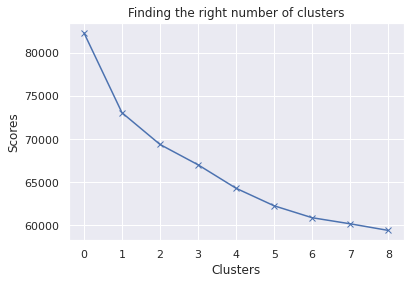

In [48]:
scores_1 = []

range_values = range(1, 10)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

In [49]:
# Find Optimal Number of Cluster Using Silhouette Score

kmeans = KMeans(n_clusters=2)
kmeans.fit(df_scaled)


KMeans(n_clusters=2)

In [50]:
kmeans.labels_

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [51]:
from sklearn.metrics import silhouette_score

label = kmeans.labels_
silhouette_score(df_scaled,label,metric='euclidean')

0.12800983164429608

In [52]:
score = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    label = kmeans.labels_
    score.append(silhouette_score(df_scaled,label,metric='euclidean'))
    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Silhouette Score')

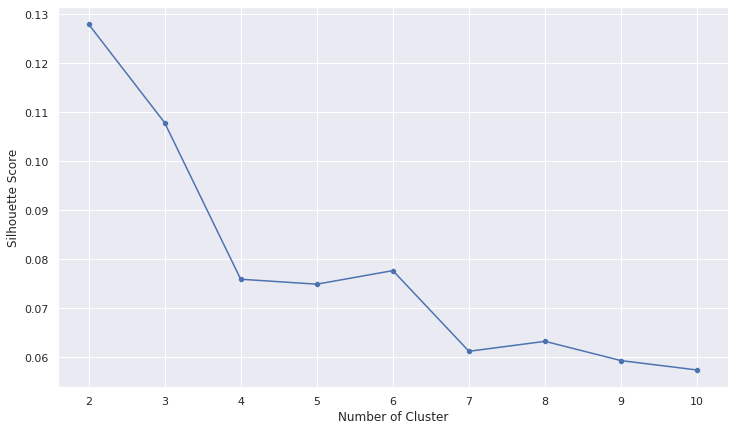

In [53]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster,score)
sns.scatterplot(number_of_cluster,score)

plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')

In [54]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [55]:
kmeans.cluster_centers_

array([[ 0.10151188,  0.17926566,  0.71922246,  0.03671706,  0.62419006,
         0.33909287,  0.01727862,  0.41900648,  0.12095032,  0.30453564,
         0.05183585,  0.08639309,  0.42332613,  0.57667387,  0.12526998,
         0.01295896,  0.05615551,  0.20950324,  0.12526998,  0.15334773,
         0.05183585,  0.26133909,  0.00431965,  0.23326134,  0.51403888,
         0.25269978,  1.        ,  0.72786177,  0.27213823, -0.20936442,
         0.65140031, -0.009798  , -0.03041824,  0.15677512,  0.05499055,
        -0.01090466,  0.02745332,  1.02547997,  0.01894709,  0.99438578,
         0.02626905,  0.05020795, -0.04723183, -0.00707953,  0.03043509,
         0.        ,  0.07463587,  1.01645878, -0.00852151,  0.02921541,
         0.95542565,  0.9361425 ,  0.7945606 ,  0.87859784],
       [ 0.10228401,  0.19265144,  0.70506455,  0.04568024,  0.6673287 ,
         0.28699106,  0.01886792,  0.40913605,  0.10228401,  0.32075472,
         0.05759682,  0.09136048,  0.38927507,  0.61072493,  0.

In [56]:
kmeans.cluster_centers_.shape

(2, 54)

In [57]:
transformer.transformers_

[('One Hot',
  OneHotEncoder(),
  ['BusinessTravel',
   'Department',
   'EducationField',
   'Gender',
   'JobRole',
   'MaritalStatus',
   'Over18',
   'OverTime']),
 ('Scaler',
  StandardScaler(),
  ['Attrition',
   'Age',
   'DailyRate',
   'DistanceFromHome',
   'Education',
   'EnvironmentSatisfaction',
   'HourlyRate',
   'JobInvolvement',
   'JobLevel',
   'JobSatisfaction',
   'MonthlyIncome',
   'MonthlyRate',
   'NumCompaniesWorked',
   'PercentSalaryHike',
   'PerformanceRating',
   'RelationshipSatisfaction',
   'StandardHours',
   'StockOptionLevel',
   'TotalWorkingYears',
   'TrainingTimesLastYear',
   'WorkLifeBalance',
   'YearsAtCompany',
   'YearsInCurrentRole',
   'YearsSinceLastPromotion',
   'YearsWithCurrManager'])]

In [58]:
print(transformer.transformers_[0][1].get_feature_names())
print(transformer.transformers_[1][2])

['x0_Non-Travel' 'x0_Travel_Frequently' 'x0_Travel_Rarely'
 'x1_Human Resources' 'x1_Research & Development' 'x1_Sales'
 'x2_Human Resources' 'x2_Life Sciences' 'x2_Marketing' 'x2_Medical'
 'x2_Other' 'x2_Technical Degree' 'x3_Female' 'x3_Male'
 'x4_Healthcare Representative' 'x4_Human Resources'
 'x4_Laboratory Technician' 'x4_Manager' 'x4_Manufacturing Director'
 'x4_Research Director' 'x4_Research Scientist' 'x4_Sales Executive'
 'x4_Sales Representative' 'x5_Divorced' 'x5_Married' 'x5_Single' 'x6_Y'
 'x7_No' 'x7_Yes']
['Attrition', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [59]:
dfnew2.shape

(2940, 33)

In [60]:
dfnew2.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [61]:
feature_imp = list(transformer.transformers_[0][1].get_feature_names())+list((transformer.transformers_[1][2]))
feature_imp

['x0_Non-Travel',
 'x0_Travel_Frequently',
 'x0_Travel_Rarely',
 'x1_Human Resources',
 'x1_Research & Development',
 'x1_Sales',
 'x2_Human Resources',
 'x2_Life Sciences',
 'x2_Marketing',
 'x2_Medical',
 'x2_Other',
 'x2_Technical Degree',
 'x3_Female',
 'x3_Male',
 'x4_Healthcare Representative',
 'x4_Human Resources',
 'x4_Laboratory Technician',
 'x4_Manager',
 'x4_Manufacturing Director',
 'x4_Research Director',
 'x4_Research Scientist',
 'x4_Sales Executive',
 'x4_Sales Representative',
 'x5_Divorced',
 'x5_Married',
 'x5_Single',
 'x6_Y',
 'x7_No',
 'x7_Yes',
 'Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 '

In [62]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [feature_imp])
cluster_centers           

,x0_Non-Travel,x0_Travel_Frequently,x0_Travel_Rarely,x1_Human Resources,x1_Research & Development,x1_Sales,x2_Human Resources,x2_Life Sciences,x2_Marketing,x2_Medical,x2_Other,x2_Technical Degree,x3_Female,x3_Male,x4_Healthcare Representative,x4_Human Resources,x4_Laboratory Technician,x4_Manager,x4_Manufacturing Director,x4_Research Director,x4_Research Scientist,x4_Sales Executive,x4_Sales Representative,x5_Divorced,x5_Married,x5_Single,x6_Y,x7_No,x7_Yes,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.101512,0.179266,0.719222,0.036717,0.624190,0.339093,0.017279,0.419006,0.120950,0.304536,0.051836,0.086393,0.423326,0.576674,0.125270,0.012959,0.056156,0.209503,0.125270,0.153348,0.051836,0.261339,0.004320,0.233261,0.514039,0.252700,1.0,0.727862,0.272138,-0.209364,0.651400,-0.009798,-0.030418,0.156775,0.054991,-0.010905,0.027453,1.025480,0.018947,0.994386,0.026269,0.050208,-0.047232,-0.007080,0.030435,0.0,0.074636,1.016459,-0.008522,0.029215,0.955426,0.936143,0.794561,0.878598
1,0.102284,0.192651,0.705065,0.045680,0.667329,0.286991,0.018868,0.409136,0.102284,0.320755,0.057597,0.091360,0.389275,0.610725,0.072493,0.045680,0.231380,0.004965,0.086395,0.008937,0.266137,0.203575,0.080437,0.217478,0.431976,0.350546,1.0,0.712016,0.287984,0.096262,-0.299502,0.004505,0.013986,-0.072082,-0.025284,0.005014,-0.012623,-0.471497,-0.008712,-0.457200,-0.012078,-0.023085,0.021716,0.003255,-0.013993,0.0,-0.034316,-0.467349,0.003918,-0.013433,-0.439287,-0.430421,-0.365324,-0.403963


In [63]:
labels.shape

(2940,)

In [64]:
labels.min()

0

In [65]:
labels.max()

1

(22) Tambahkan 1 kolom 'label' pada dataset yang berisi nomor cluster untuk tiap row, berdasarkan model kmeans clustering yang telah dibuat.

In [66]:
# concatenate the clusters labels to our original dataframe

df_cluster = pd.concat([dfnew2, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,1
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,1


In [67]:
df[df_cluster['cluster']==0]

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
8,0,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,0,36,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7
15,0,29,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,2,Female,51,4,3,Manufacturing Director,1,Divorced,9980,10195,1,Y,No,11,3,3,80,1,10,1,3,10,9,8,8
18,0,53,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,Female,78,2,4,Manager,4,Married,15427,22021,2,Y,No,16,3,3,80,0,31,3,3,25,8,3,7
22,0,34,Travel_Rarely,419,Research & Development,7,4,Life Sciences,1,Female,53,3,3,Research Director,2,Single,11994,21293,0,Y,No,11,3,3,80,0,13,4,3,12,6,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0,41,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,Female,60,2,4,Manufacturing Director,2,Married,13570,5640,0,Y,No,23,4,3,80,1,21,3,3,20,7,0,10
2917,0,36,Non-Travel,301,Sales,15,4,Marketing,4,Male,88,1,2,Sales Executive,4,Divorced,5406,10436,1,Y,No,24,4,1,80,1,15,4,2,15,12,11,11
2932,0,39,Travel_Rarely,722,Sales,24,1,Marketing,2,Female,60,2,4,Sales Executive,4,Married,12031,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6
2936,0,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7


In [68]:
df[df_cluster['cluster']==1]

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,31,Non-Travel,325,Research & Development,5,3,Medical,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7
2934,0,26,Travel_Rarely,1167,Sales,5,3,Other,4,Female,30,2,1,Sales Representative,3,Single,2966,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0
2935,0,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2937,0,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
